Nama: Yasmine Alifta

NIM: 2311110044

Kelas: SD04-01

- hapus kolom target
- Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data! Hasil dari EDA dan pre-processing dapat diinterpretasikan
- Lakukan pemodelan menggunakan algoritma k-means, buat penentuan nilai k dengan membuat diagram elbow, serta simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_K-Means”!
- Lakukan pemodelan menggunakan algoritma db-scan, simpan hasil label dari algoritma db-scan menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_DB-Scan”!
- Buat plot hasil permodelan menggunakan k-means dan db-scan! Interpretasikanlah hasil plot yang didapat!
- Menggunakan matriks evaluasi Silhouette score dan Davies-Bouldin Index, tentukan mana model dengan nilai evaluasi terbaik! Interpretaskanlah hasil matriks evaluasi yang didapat!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [2]:
# load dataset
df = pd.read_csv("/content/Dataset-Tugas.csv")
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


dataset memiliki 150 baris dan 5 kolom

In [4]:
# melihat missing value
df.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


dataset bersih dari missing value

In [5]:
# analisis deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


pada dataset, variabel:
- sepal_length memiliki nilai max nya 7.9, min nya 4.3
- sepal_width memiliki nilai max nya 4.4, min nya 2
- petal_length memiliki nilai max nya 6.9, min nya 1
- petal_width memiliki nilai max nya 2.5, min nya 0.1

In [6]:
# Menghapus kolom target (class)
df.drop(['class'], axis=1, inplace=True)
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


kolom class sudah dihapus dari dataset, menyisakan 4 kolom yang bertipe float semua

In [8]:
# mengecek outlier
def outlier (data):
  columns = df.select_dtypes(include=['int', 'float']).columns
  outlier_counts = {}
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
    outlier_counts[x] = len(outliers)

  return outlier_counts

outlier_counts = outlier(df)
print(f'jumlah data outlier: {outlier_counts}')

jumlah data outlier: {'sepal length': 0, 'sepal width': 4, 'petal length': 0, 'petal width': 0}


terdapat 4 outlier di variabel sepal_length

In [9]:
# menghapus otlier
def remove_outlier(data):
  columns = data.select_dtypes(include=['int', 'float']).columns
  cleaned_data = data.copy() # membuat salinan dataframe untuk menghindari perubahan pada data asli
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
  return cleaned_data

df_cleaned = remove_outlier(df)

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  146 non-null    float64
 1   sepal width   146 non-null    float64
 2   petal length  146 non-null    float64
 3   petal width   146 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB


4 outlier sudah terhapus. Sehingga baris data set menjadi 146 baris dan kolom nya ada 4 karena tadi sudah dilakukan penghapusan kolom class


In [11]:
# standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


dilakukan standarisasi data dengan standardscaler untuk memastikan setiap fitur memiliki kontribusi yang seimbang.

### **K-Means**

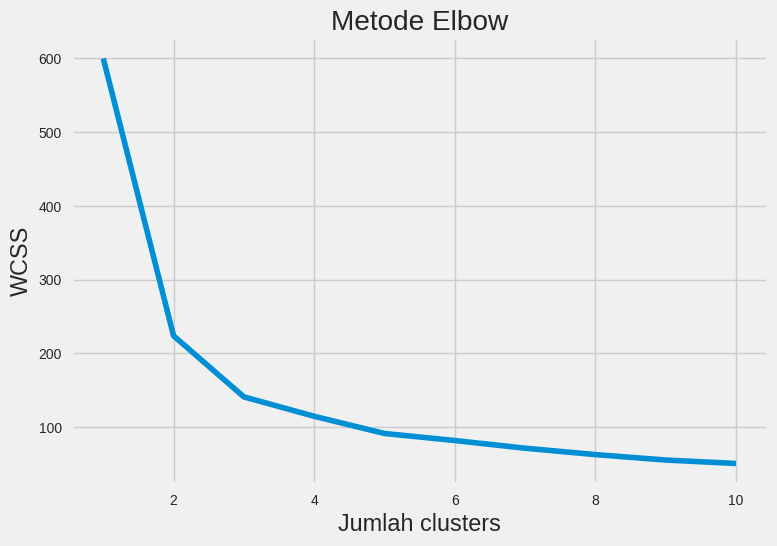

In [12]:
# menggunkan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()


k = 3

karena pada titik 3 terlihat jelas mengalami penurunan cukup signifikan tapi tidak setajam pada titik 2. Sehingga pada titik 3 merupakan siku nya.

In [13]:
# menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters= 3, init='k-means++', random_state=42)
y_pred1 = model1.fit_predict(data_scaled)

df['Label_K-Means'] = y_pred1
df.head(10)

,sepal length,sepal width,petal length,petal width,Label_K-Means
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,2
9,4.9,3.1,1.5,0.1,2


###**DB-Scan**


In [14]:
# membuat objek DBSCAN dengan paramter epsilon dan jumlah minimum sample
dbscan = DBSCAN(eps=1, min_samples=5)

# melakukan clustering
dbscan.fit(data_scaled)

# mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = dbscan.labels_
y_pred2


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [15]:
# menambahkan label menjadi kolom baru di dataset
df['Label_DB-Scan'] = dbscan.labels_
df.head(10)

,sepal length,sepal width,petal length,petal width,Label_K-Means,Label_DB-Scan
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,2,0
2,4.7,3.2,1.3,0.2,2,0
3,4.6,3.1,1.5,0.2,2,0
4,5.0,3.6,1.4,0.2,1,0
5,5.4,3.9,1.7,0.4,1,0
6,4.6,3.4,1.4,0.3,1,0
7,5.0,3.4,1.5,0.2,1,0
8,4.4,2.9,1.4,0.2,2,0
9,4.9,3.1,1.5,0.1,2,0


### **Visualisasi K-Means dan DB-Scan**

<Figure size 1000x600 with 0 Axes>

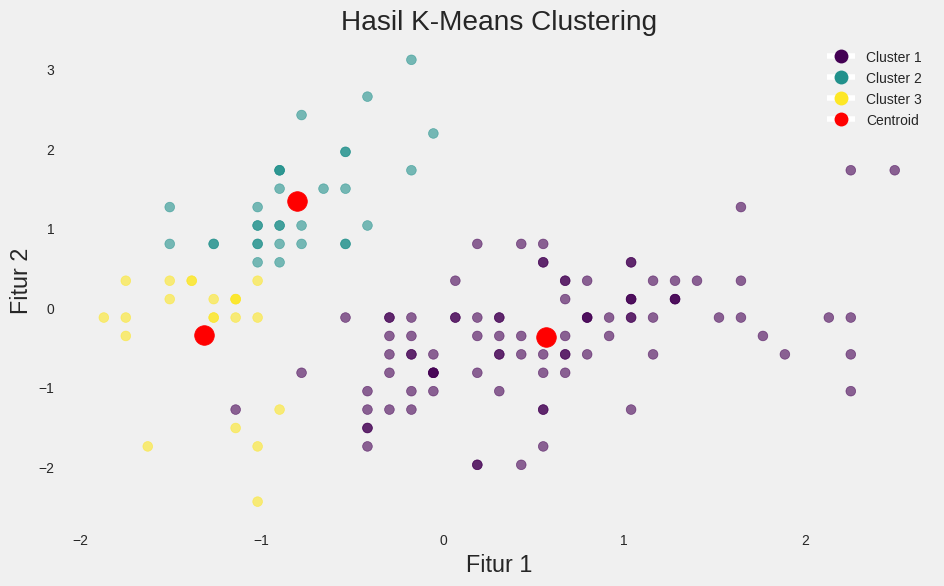

In [16]:
# Plot K-Means

kmeans = KMeans(n_clusters=3, random_state=42)
data_scaled['Label_K-Means'] = kmeans.fit_predict(data_scaled)

# centroid
centroids = kmeans.cluster_centers_


plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=data_scaled['Label_K-Means'], cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=200, label='Centroid')


legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}',
                           markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(3)]

# Menambahkan entri legenda untuk centroid
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Centroid',
                               markerfacecolor='red', markersize=10))



plt.title('Hasil K-Means Clustering')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(handles=legend_elements)
plt.grid()
plt.show()



pada scatterplot tersebut terdapat 3 cluster dengan centroid di masing-masing cluster.

- Pada cluster 1, data cenderung tersebar di sebelah kanan plot di area nilai fitur 1 yang cenderung positif dan pada nilai fitur 2 yang bervariasi antara -2 sampai 1, juga merupakan cluster dengan anggota terbanyak dan tersebar.

- Pada cluster 2, data tersebar di bagian kiri atas plot di area fitur 1 yang nilai nya cenderung negatif (-1) dan pada area fitur 2 yang nilai nya positif dari 1 - 3 dengan anggota nya yang cukup padat berkelompok.

- Pada cluster 3, data tersebar dibagian kiri bawah plot dia area fitur 1 yang bernilai negatif sekitar -2 sampai -1 dan pada area fitur 2 yang cenderung rendah dari -2 sampai 0 dengan anggota nya yang paling sedikit dari ketiga cluster yang ada.

Pemisahan antar cluster cukup jelas yang menandakan algoritma K-Means berhasil memisahkan data dengan baik. Posisi centroid juga berada di posisi yang strategis di pusat masing-masing cluster. Distribusi data






<ipython-input-17-cb0f1eb60493>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


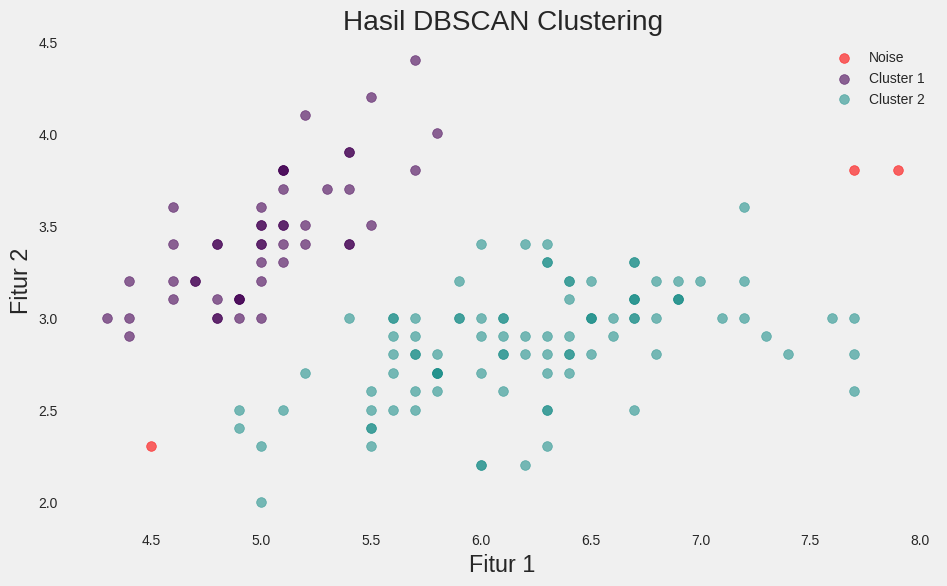

In [17]:
# Plot hasil DBSCAN
plt.figure(figsize=(10, 6))

# Memberi warna untuk setiap kluster
unique_labels = np.unique(df['Label_DB-Scan'])
colors = plt.cm.get_cmap('viridis', len(unique_labels))

# Loop untuk menggambar setiap cluster
for label in unique_labels:
    if label == -1:
        # Noise
        color = 'red'
        label_name = 'Noise'
    else:
        color = colors(label)
        label_name = f'Cluster {label + 1}'

    plt.scatter(df[df['Label_DB-Scan'] == label].iloc[:, 0],
                df[df['Label_DB-Scan'] == label].iloc[:, 1],
                color=color, label=label_name, alpha=0.6)

plt.legend()
plt.title('Hasil DBSCAN Clustering')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.grid()
plt.show()

pada scatterplot tersebut terdapat 2 cluster dan terdapat noise juga.

- Pada cluster 1, data tersebar dibagian kiri atas plot membentuk kelompok yang padat dan terhubung dengan nilai fitur 1 berkisar 4.5 - 5.5 dan nilai fitur 2 yang relatif tinggi yaitu 3 - 4.5

- Pada cluster 2, data tersebar dibagian tengah ke kanan bawah plot dan tersebar lebih luas dari cluster 1 dengan nilai fitur 1 lebih tinggi yaitu 5.5 - 8 dan nilai fitur 2 lebih rendah yaitu 2.5 - 3.5.

- Terdapat noise pada scatterplot yang berarti data tidak masuk kedalam cluster 1 maupun cluster 2 karena densitas nya rendah.




###**Silhouette score**

In [18]:
# menghitung Silhouette score algoritma k-means
Evaluasi_KMeans = silhouette_score(data_scaled, y_pred1)
print("Silhouette Score K-Means: ", Evaluasi_KMeans)

Silhouette Score K-Means:  0.5566696965997611


In [19]:
# menghitung silhouette score algoritma db-scan
Evaluasi_DBSCAN = silhouette_score(data_scaled, y_pred2)
print("Silhouette Score DB-Scan: ", Evaluasi_DBSCAN)

Silhouette Score DB-Scan:  0.5393967338196668


### **Davies-Bouldin Index**

In [20]:
# menghitung DBI algoritma KMeans
dbi_score1 = davies_bouldin_score(data_scaled, y_pred1)
print("Davies-Bouldin Index K-Means: ", dbi_score1)

Davies-Bouldin Index K-Means:  0.6797973215645451


In [21]:
# menghitung DBI algoritma db-scan
dbi_score2 = davies_bouldin_score(data_scaled, y_pred2)
print("Davies-Bouldin Index DB-Scan: ", dbi_score2)

Davies-Bouldin Index DB-Scan:  2.5017940613716037


Didapat:

1. Silhouette Score:
  - K-Means: 0.5566
  - DB-Scan: 0.5393


2. Davies-Bouldin Index (DBI):
  - K-Means: 0.6797
  - DB-Scan: 2.5017

interpretasi:
1. Silhouette score akan menunjukkan seberapa baik data yaitu jika score nya mendekati 1. Pada silhouette score dengan menggunakan K-Means dan DB-Scan, terlihat bahwa score K-Means sedikit lebih tinggi dari DB-Scan sehingga K-Means menghasilkan clustering yang lebih baik.

2. Davies-Bouldin Index (DBI) akan menunjukkan tingkat kesalahan atau overlap antar cluster. Nilai yang lebih rendah menunjukkan cluster yang lebih baik. Pada DBI dengan menggunakan K-Means dan DB-Scan, terlihat bahwa score K-Means terlihat jauh lebih rendah dari score DB-Scan sehingga K-Means masih lebih baik dalam menghasilkan clustering.

Kesimpulan:

Berdasarkan keua matriks evaluasi tersebut, didapat bahwa **K-Means memiliki kemampuan yang lebih baik** dalam melakukan clustering dataset dibanding DB-Scan.

